<a href="https://colab.research.google.com/github/sikora-toma/gym-pendulum-control/blob/main/pendulum_control_RL_PPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [2]:
env = gym.make('Pendulum-v1')

In [3]:
env.observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [4]:
!pip install pyvirtualdisplay PyOpenGL PyOpenGL-accelerate
!pip install gym[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 4.1 MB/s 
     |████████████████████████████████| 966 kB 30.7 MB/s 
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14
    Running setup.py install for mujoco-py ... error
  Rolling back uninstall of mujoco-py
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py-2.1.2.14.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py-2.1.2.14.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py
ERROR: Command errored out with exit 

In [5]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from math import atan2
import numpy as np

In [7]:
cos, sin, v = env.reset()

In [8]:
atan2(sin, cos)

-2.884420651199573

In [9]:
plt.imshow(env.render('rgb_array'))

Exception: ignored

In [12]:
!pip install stable-baselines3[extra]

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

import torch as th

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html
policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=[dict(pi=[32, 32], vf=[32, 32])])

# https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
model = PPO("MlpPolicy", env, verbose=1,  learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, policy_kwargs=None)

model.learn(total_timesteps=int(2e5), progress_bar=True)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.32e+03 |
| time/              |           |
|    fps             | 903       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.28e+03    |
| time/                   |              |
|    fps                  | 700          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0011438446 |
|    clip_fraction        | 0.000635     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -0.00355     |
|    

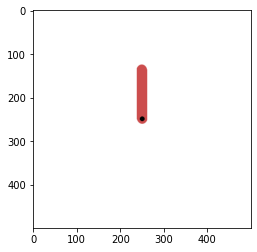

In [ ]:
env = gym.make('Pendulum-v1')
obs = env.reset(options={'x_init':np.pi/8, 'y_init':0})
img = plt.imshow(env.render('rgb_array')) # only call this once


torques, angles = [], []
# gym simulates at 20Hz, one step is 0.05s
for _ in range(50):
    img.set_data(env.render('rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = model.predict(obs, deterministic=True)
    angles.append(atan2(obs[1], obs[0]))
    torques.append(action[0])
    obs, _, _, _ = env.step(action)

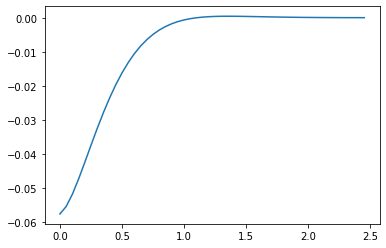

In [ ]:
plt.plot([0.05*i for i in range(len(angles))], angles)

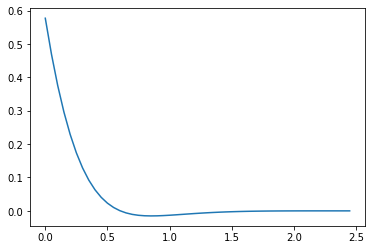

In [ ]:
plt.plot([0.05*i for i in range(len(torques))], torques)

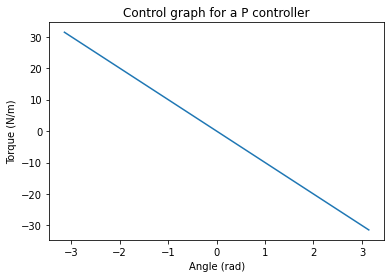

In [ ]:
x = np.linspace(-2, 2, 100)
y = x ** 2


fig, ax = plt.subplots()
ax.plot(np.linspace(-np.pi, np.pi, 100), [get_action(np.cos(i), np.sin(i), 0) for i in np.linspace(-np.pi, np.pi, 100)])
ax.set(xlabel='Angle (rad)', ylabel='Torque (N/m)',
       title='Control graph for a P controller')
plt.show()

[Text(0, 0.5, 'Angular velocity (rad/s)'),
 Text(0.5, 0, 'Angle (rad)'),
 Text(0.5, 1.0, 'Pendulum phase portrait with PID')]

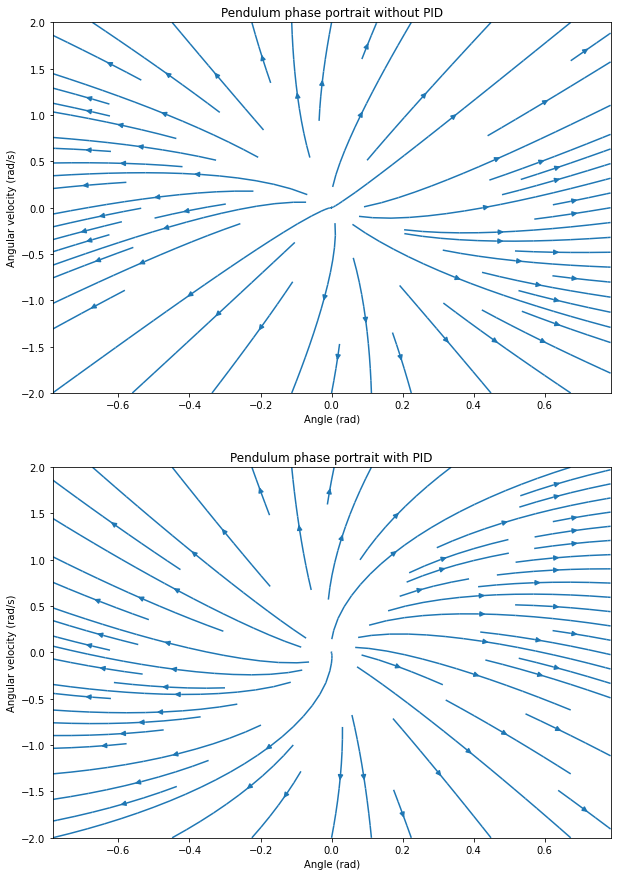

In [ ]:
# dynamics equation: newthdot = thdot + (3 * g / (2 * l) * np.sin(th) + 3.0 / (m * l**2) * u) * dt
# controller.get_action(sin(X), cos(X), Y)
THETADOT_MAX, THETA_MAX = np.pi/4, 2
Y, X = np.mgrid[-THETA_MAX:THETA_MAX:100j, -THETADOT_MAX:THETADOT_MAX:100j]

dt = 0.05
g = 10.0
m = 1.0
l = 1.0

#   Without applying any torque
V = Y + (3 * g / (2 * l) * np.sin(X) + 3.0 / (m * l**2) * 0) * dt
U = X + V * dt
#   Using the PID controller (TODO there's a minus missing somewhere to turn the direction)
V_PID = Y + (3 * g / (2 * l) * np.sin(X) + 3.0 / (m * l**2) * np.vectorize(controller.get_action)(np.cos(X), np.sin(X), Y)) * dt
U_PID = X + V_PID * dt

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

ax[0].streamplot(X, Y, U, V, density=[0.5, 1])
ax[0].set(xlabel='Angle (rad)', ylabel='Angular velocity (rad/s)', title='Pendulum phase portrait without PID')

ax[1].streamplot(X, Y, U_PID, V_PID, density=[0.5, 1])
ax[1].set(xlabel='Angle (rad)', ylabel='Angular velocity (rad/s)', title='Pendulum phase portrait with PID')

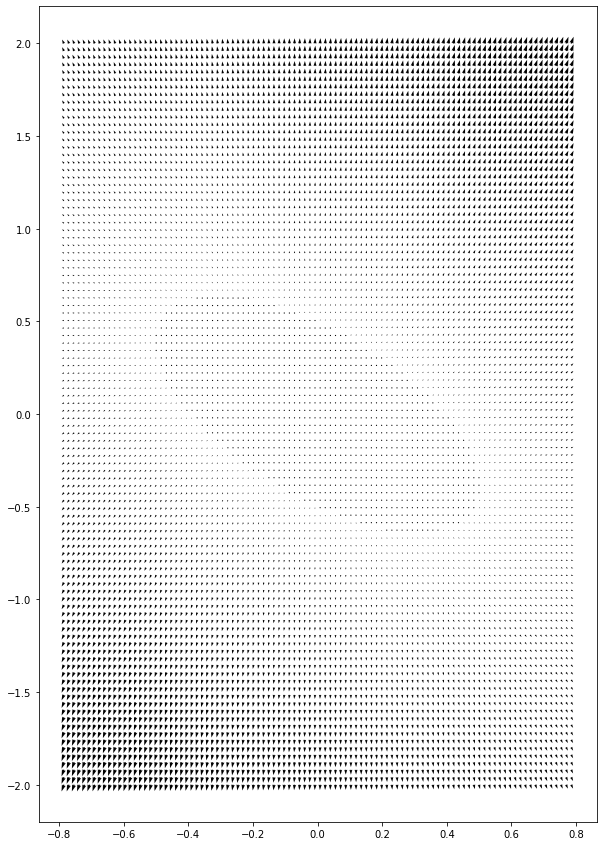

In [ ]:
# TODO fix
fig, ax = plt.subplots(figsize=(10,15))
q = ax.quiver(X, Y, U, V)